# Prosper Loan Data Analysis 
### by Youssef Kamal

## Investigation Overview

**This Investigation walks through Loan Prosper Dataset. It aims to have a basic analysis of this dataset nature, what trends are there, what features are more important, and which give more info about Loan Status. There're many different visualizations to look at things more throughly. Finally, a summary of what've been collected.**

## Dataset Overview

**This Dataset is US Loan Prosper Dataset. There're many features, among which a few are selected for this investigation. This dataset is from Aug 2009 to March 2014. It has 100k+ records, covering most Occupations, states, Interest rates, etc.**

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
df = pd.read_csv('prosperLoanData.csv')

df_cols = ['Term', 'LoanStatus', 'BorrowerAPR', 'BorrowerRate', 'ProsperRating', 'Occupation',
        'EmploymentStatus', 'IsBorrowerHomeowner', 'BorrowerState', 'DebtToIncomeRatio', 'IncomeVerifiable',
        'IncomeRange', 'LoanOriginalAmount', 'MonthlyLoanPayment', 'Recommendations', 'LoanOriginationDate']

df = df[df_cols].sample(10000)
df.LoanOriginationDate = pd.to_datetime(df.LoanOriginationDate)

In [4]:
def labelingh(ax, s = 13, w_=1.05, y_=0.5):
    for p in ax.patches:
        width = p.get_width()
        x, y = p.get_xy()
        ax.annotate(f'{width:.0f}', (width*w_, y+y_), fontsize=s, va='center')

def labelingv(ax, s = 13, h_=1.05, x_=0.5):
    for p in ax.patches:
        height = p.get_height()
        x, y = p.get_xy()
        ax.annotate(f'{height:.0f}', (x+x_, height*h_), fontsize=s, ha='center')
        
def rand_jitter(arr, f=.01):
    stdev = f*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr)) * stdev

_ = [[1*10**x,3*10**x] for x in range(5)]
log_ticks = [i for j in _ for i in j]
_ = [['%ik'%(1*10**x),'%ik'%(3*10**x)] for x in range(2)]
log_labels = [0,3,10,30,100,300]+[i for j in _ for i in j]

color = sb.color_palette()[0]

### `LoanStatus` distribution  
**This shows loan status distibution. It looks like past due are few and all promising, on full-data though, there're more of past due and cancelled loans.**

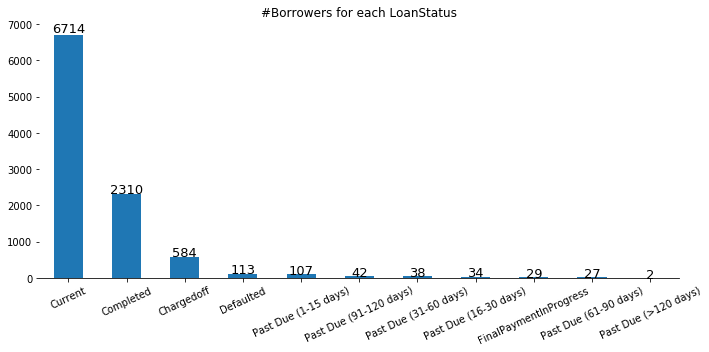

In [6]:
count = df.LoanStatus.value_counts()

# plotting bar chart
count.plot(kind='bar', figsize=(10,5),
           title = '#Borrowers for each LoanStatus',
           legend=False, rot=25)

[plt.gca().spines[x].set_visible(False) for x in ['top', 'right', 'left']]
labelingv(plt.gca(), h_=1.01, x_=.25)

# plt.yscale('log'); plt.yticks(log_ticks[:8]+[7000], log_labels[:8]+['7k'])

plt.tight_layout()

### `BorrowerAPR` distribution  
**This shows borrowers' annual perc. rate. There're peaks some preceded by falls, with many different perc. in between ditributed equally on average, concentrated around 0.2%. There's also a distinctive peak at around 0.35 that's preceded by zero occurances, this might need more investigation.**

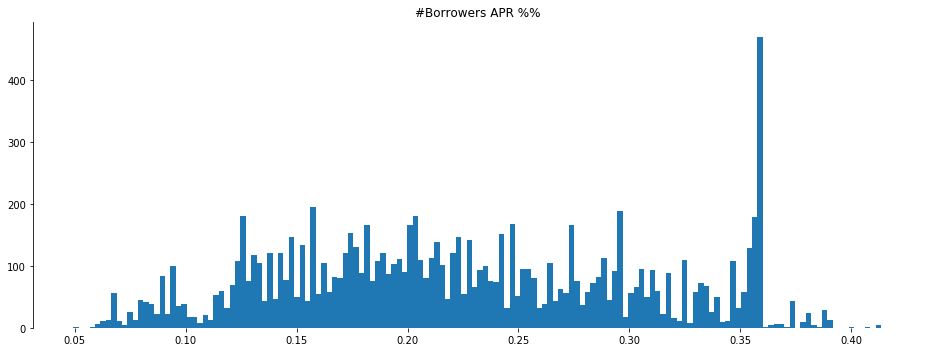

In [7]:
# plotting histogram
df.BorrowerAPR.plot(kind='hist', bins=150, figsize=(13, 5),
                    title = '#Borrowers APR %%',
                    legend=False, rot=0)

[plt.gca().spines[x].set_visible(False) for x in ['top', 'right', 'bottom']]
plt.ylabel('')

plt.tight_layout()

### `BorrowerRate` distribution  
**This shows borrowers ineterst rates, it shows some peaks preceeded immediatly with a fall, with peaks creating a trend all the way.**

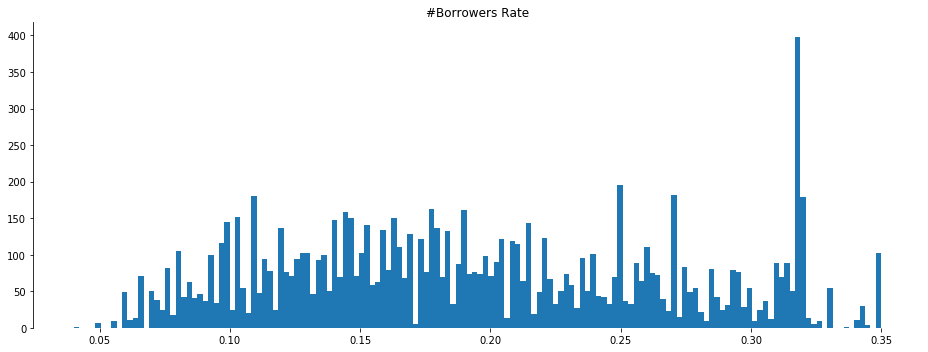

In [8]:
# plots the bar graph
df.BorrowerRate.plot(kind='hist', bins=150, figsize=(13, 5),
                     title = '#Borrowers Rate',
                     legend=False, rot=0)

[plt.gca().spines[x].set_visible(False) for x in ['top', 'right', 'bottom']]
plt.ylabel('')

plt.tight_layout()

## BorrowerAPR / Rate change over years



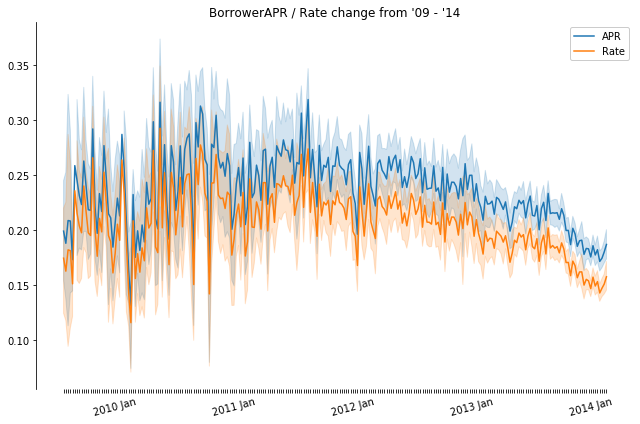

In [9]:
_ = df[['LoanOriginationDate', 'BorrowerAPR', 'BorrowerRate']].copy()
_['Date_Week'] = _.LoanOriginationDate.dt.strftime('%Y-%W-00')

plt.figure(figsize=(9,6))

sb.lineplot(data=_, x='Date_Week', y='BorrowerAPR', label='APR')

sb.lineplot(data=_, x='Date_Week', y='BorrowerRate', label='Rate')

sb.despine(bottom=True)

plt.title('BorrowerAPR / Rate change from \'09 - \'14', size = 12)
plt.xlabel(''); plt.ylabel('')

ticks, labels = plt.xticks()
labels = ['']*23+['2010 Jan']+['']*52+['2011 Jan']+['']*52+['2012 Jan']+['']*52+['2013 Jan']+['']*52+['2014 Jan']+['']*10
plt.xticks(ticks, labels)
plt.xticks(rotation=15)

plt.legend(loc='upper right', framealpha=1)

plt.tight_layout()

## BorrowerAPR vs Loan Original Amount over different Loan Status


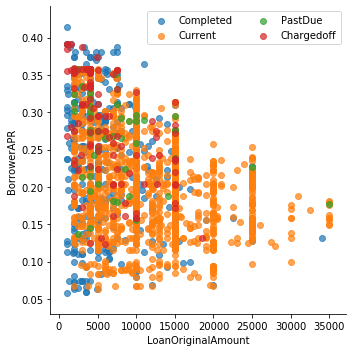

In [10]:
_ = df[['LoanStatus', 'LoanOriginalAmount', 'BorrowerAPR']].sample(2000).copy()
_.LoanStatus.replace(to_replace='Past Due.*', value='PastDue', regex=True, inplace=True)

g = sb.FacetGrid(data = _, hue='LoanStatus', height=5, palette=sb.color_palette()[:6],
                hue_order=['Completed', 'Current', 'PastDue', 'Chargedoff'])
g.map(plt.scatter, 'LoanOriginalAmount', 'BorrowerAPR', alpha=.7)
# g.set(xscale = 'log') # need to set scaling before customizing ticks
# x_ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
# g.set(xticks = x_ticks, xticklabels = x_ticks)
plt.legend(loc='upper right', ncol=2)

plt.tight_layout()